In [1]:
# Description: This python program will compute simple returns, get daily returns, and volatility using pandas_datareader

In [2]:
# import the libraries
from datetime import datetime
import numpy as np 
import pandas as pd 
import pandas_datareader as web
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [3]:
# Get stocks for portfolio, using FAANG as an example
stockSymbols = ["FB", "AMZN", "AAPL", "NFLX", "GOOG"]

In [4]:
# Get the stock starting data
stockStartDate = '2013-01-01'

In [6]:
# Get todays date and format it in the form YYYY-MM-DD
today = datetime.today().strftime('%Y-%m-%d')

print(today)

2020-09-25


In [8]:
# Get the number of assets in the portfolio
numAssets = len(stockSymbols)

print('You have ' + str(numAssets) + ' assets in your portfolio.')

You have 5 assets in your portfolio.


In [9]:
# function to get the stock prices in the portfolio
def getMyPortfolio(stocks=stockSymbols, start=stockStartDate, end=today, col='Adj Close'):
    data = web.DataReader(stocks, data_source='yahoo', start=start, end=end)['Adj Close']
    return data 

In [10]:
# Get the stock portfolio Adj Close price
my_stonks = getMyPortfolio(stockSymbols)
my_stonks

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,17.094694,13.144286,360.274597
2013-01-03,27.770000,258.480011,16.878920,13.798572,360.483826
2013-01-04,28.760000,259.149994,16.408764,13.711429,367.607117
2013-01-07,29.420000,268.459991,16.312239,14.171429,366.003143
2013-01-08,29.059999,266.380005,16.356150,13.880000,365.280823
...,...,...,...,...,...
2020-09-21,248.149994,2960.469971,110.080002,487.350006,1431.160034
2020-09-22,254.750000,3128.989990,111.809998,491.170013,1465.459961
2020-09-23,249.020004,2999.860107,107.120003,470.609985,1415.209961


In [11]:
# create a function to visualize the portfolio
def showGraph(stocks = stockSymbols, start = stockStartDate, end = today, col = 'Adj Close'):

    # Create a title for the graph
    title = 'Porfolio ' +col+ ' Price History'

    # Get the stonks
    my_stocks = getMyPortfolio(stocks=stocks, start=start, end=end, col=col)

    # Give the figure size
    plt.figure(figsize=(16,8))

    # Loop through each stock and plot the price
    for c in my_stocks.columns.values:
        plt.plot( my_stocks[c], label=c)

    plt.title(title)
    plt.xlabel('Date', fontsize=18)
    plt.ylabel(col + ' Price USD ($)', fontsize=18)
    plt.legend(my_stocks.columns.values, loc='upper left')
    plt.show()

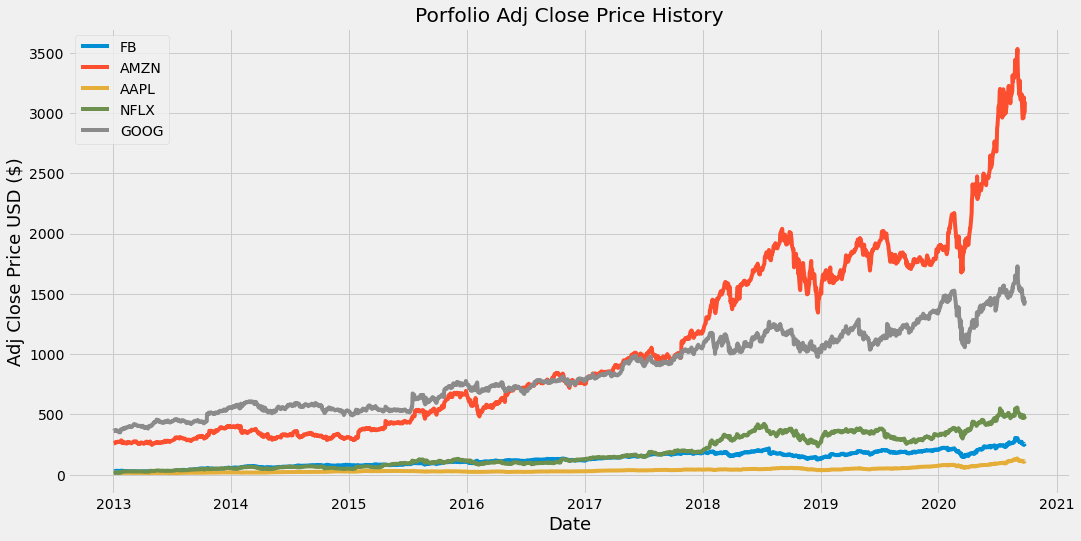

In [12]:
# show graph for Adj Close price for FAANG
showGraph(stockSymbols)

In [15]:
# Calculate the simple returns: (today's price / yesterday's price) - 1
daily_simple_returns = my_stonks.pct_change(1)

# show the daily simple returns
daily_simple_returns

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005883,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002692,-0.020565,-0.001974
...,...,...,...,...,...
2020-09-21,-0.017344,0.001882,0.030326,0.037003,-0.019747
2020-09-22,0.026597,0.056923,0.015716,0.007838,0.023967
2020-09-23,-0.022493,-0.041269,-0.041946,-0.041859,-0.034290


In [18]:
# show the stock correlation, when a change in one variable results in a change in another, if one stock goes up and another does by the same amount, result is 1, if it goes down by the same amount, result would be negative one
daily_simple_returns.corr()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,1.000000,0.511676,0.444459,0.355911,0.564995
AMZN,0.511676,1.000000,0.440722,0.444334,0.609141
AAPL,0.444459,0.440722,1.000000,0.259914,0.525661
NFLX,0.355911,0.444334,0.259914,1.000000,0.421179
GOOG,0.564995,0.609141,0.525661,0.421179,1.000000


In [19]:
# show a covariance matrix for simple returns: the diagonal values are the variance of the stocks (the spread of their values in the data set, higher variance means higher risk of losing returns(higher volatility but higher reward when getting it right, and vice versa)), the rest are covariances (google it) 
daily_simple_returns.cov()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,0.000469,0.000214,0.000172,0.000224,0.000197
AMZN,0.000214,0.000372,0.000152,0.000249,0.000190
AAPL,0.000172,0.000152,0.000320,0.000135,0.000152
NFLX,0.000224,0.000249,0.000135,0.000844,0.000198
GOOG,0.000197,0.000190,0.000152,0.000198,0.000261


In [20]:
# show the variance only
daily_simple_returns.var()

Symbols
FB      0.000469
AMZN    0.000372
AAPL    0.000320
NFLX    0.000844
GOOG    0.000261
dtype: float64

In [21]:
# print the standard deviation for daily simple reutrns (stock volatility)
print('The stock volatility: ')
daily_simple_returns.std()

The stock volatility: 


Symbols
FB      0.021647
AMZN    0.019279
AAPL    0.017886
NFLX    0.029052
GOOG    0.016144
dtype: float64

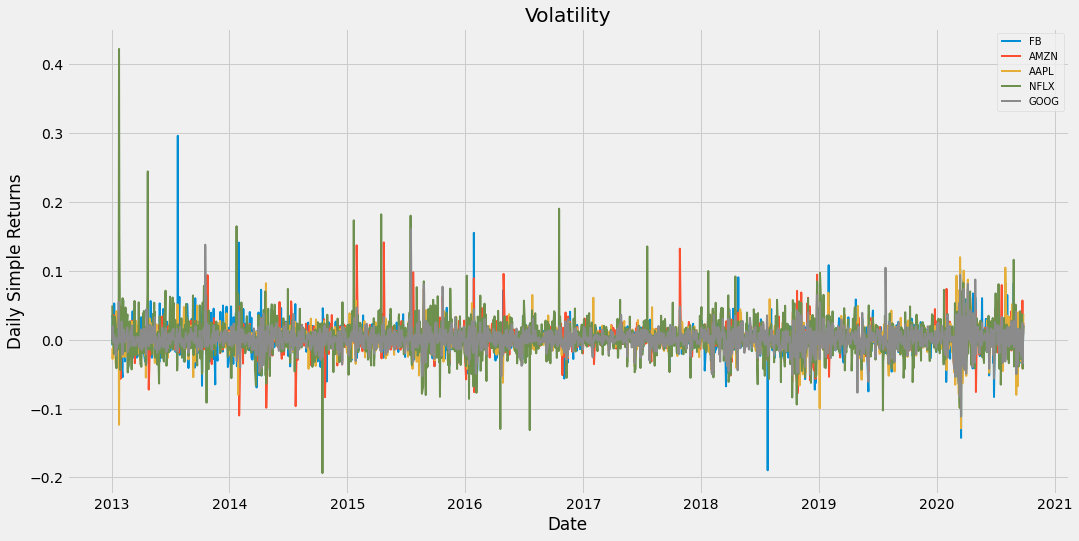

In [23]:
# visualize the stocks daily simple returns
plt.figure(figsize=(16,8))

# loop through each stock and plot the simple returns
for c in daily_simple_returns.columns.values:
    plt.plot(daily_simple_returns.index, daily_simple_returns[c], lw=2, label=c)

# create legend and labels and show
plt.legend(loc='upper right', fontsize=10)
plt.title('Volatility')
plt.ylabel('Daily Simple Returns')
plt.xlabel('Date')
plt.show()

In [24]:
# show the mean of the daily simple return: The average daily returns we can expect
dailyMean = daily_simple_returns.mean()

#print it
print('The Daily Mean Simple Return: ')
print(dailyMean)

The Daily Mean Simple Return: 
Symbols
FB      0.001366
AMZN    0.001463
AAPL    0.001128
NFLX    0.002260
GOOG    0.000843
dtype: float64


In [25]:
# calculate the expected porfolio daily return
randomWeights = np.array([0.4, 0.1, 0.3, 0.1, 0.1]) # 40% of porfolio to FB, 10% to AMZN, 30% to AAPL, 10% to NFLX, and 10% to GOOG

portfolioSimpleReturn = np.sum(dailyMean * randomWeights)

# print the expected portfolio return
print('The Daily Expected Portfolio return is: ' + str(portfolioSimpleReturn))

The Daily Expected Portfolio return is: 0.0013412840934795185


In [26]:
# calc the yearly portfolio simple return, 253 is the number of weekdays the brokers are open for 2020
print('Expected annualized portfolio simple return: ' + str(portfolioSimpleReturn * 253))

Expected annualized portfolio simple return: 0.3393448756503182


In [27]:
# calculate the growth of the investment: ((period1 + 1) * (period2 + 1) * ... * (periodn + 1))
dailyCumalativeSimpleReturn = (daily_simple_returns + 1).cumprod()

# show the cumalative simple returns
dailyCumalativeSimpleReturn

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.991786,1.004547,0.987378,1.049777,1.000581
2013-01-04,1.027143,1.007151,0.959875,1.043147,1.020353
2013-01-07,1.050714,1.043333,0.954228,1.078144,1.015900
2013-01-08,1.037857,1.035249,0.956797,1.055972,1.013896
...,...,...,...,...,...
2020-09-21,8.862500,11.505460,6.439425,37.076947,3.972415
2020-09-22,9.098214,12.160390,6.540626,37.367569,4.067619
2020-09-23,8.893572,11.658545,6.266272,35.803389,3.928143


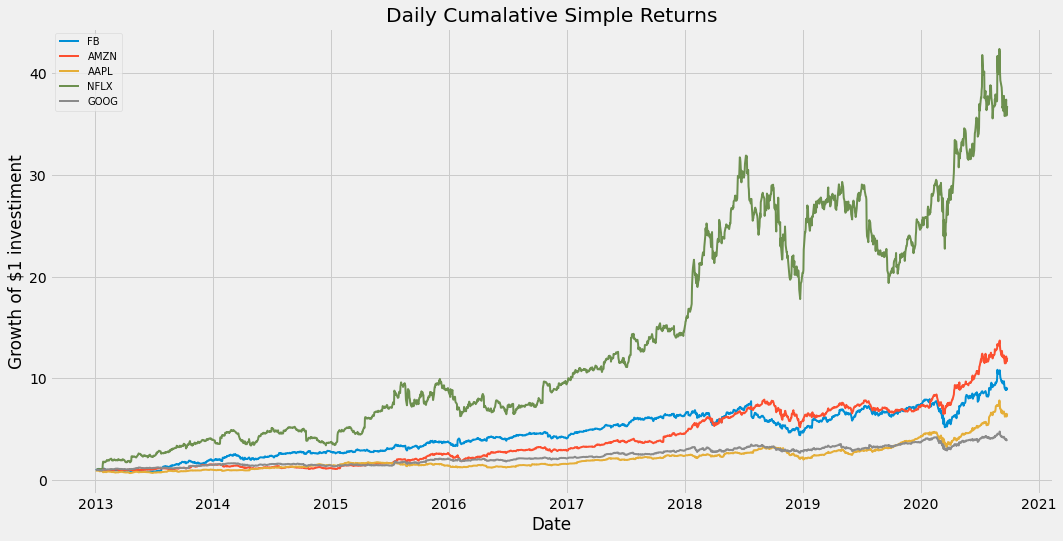

In [28]:
# visualize the daily cumalative simple returns, if $1 is invested at the beggining of 2013, then the graph shows how much we can get back when taken out at the following dates
plt.figure(figsize=(16,8))

for c in dailyCumalativeSimpleReturn.columns.values:
    plt.plot(dailyCumalativeSimpleReturn.index, dailyCumalativeSimpleReturn[c], lw=2, label=c)

plt.legend(loc='upper left', fontsize=10)
plt.xlabel('Date')
plt.ylabel('Growth of $1 investiment')
plt.title('Daily Cumalative Simple Returns')
plt.show()